In [1]:
import sys
sys.path.append('../')
from fcc import *

In [118]:
# reload fcc module while working
del sys.modules['fcc']
from fcc import *

In [119]:
# read in discrete dataset
retina = couscous.from_file(datafile='../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv.gz', data_type='counts', labels=[None, 0], 
                            barcodefile='archive/pymethods_out/retina_clu.csv')

In [120]:
retina.fcc_PCA(data_type='counts', transform='arcsinh', n_components=50)

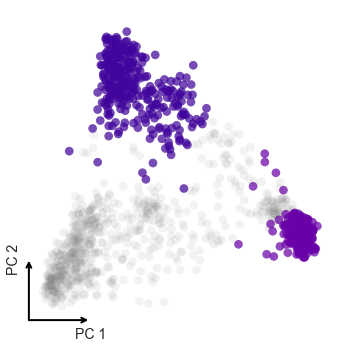

In [121]:
retina.plot_barcodes('PCA',ranks=['0','1'])

In [122]:
# perform tSNE and UMAP on the PCA results
retina.fcc_tSNE(data_type='PCA', perplexity=30, seed=18)
retina.fcc_UMAP(data_type='PCA', perplexity=30, seed=18)

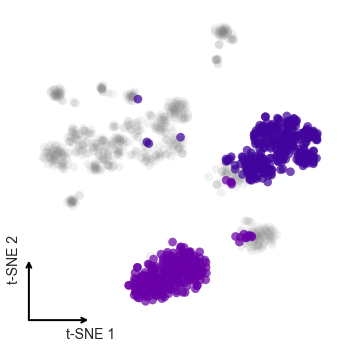

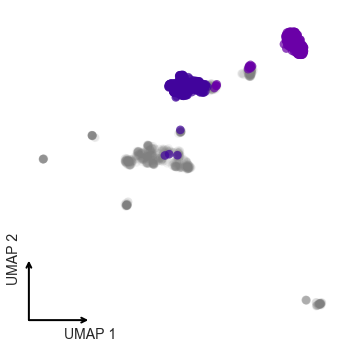

In [123]:
# see what both DR projections look like
retina.plot_barcodes('t-SNE',ranks=['0','1'])
retina.plot_barcodes('UMAP',ranks=['0','1'])

In [124]:
retina.barcode_counts()

0.0    309
1.0    281
2.0    258
3.0    130
4.0     94
5.0     89
6.0     77
7.0     49
8.0     39
Name: Barcode, dtype: int64

In [125]:
zero = retina.data['counts'].loc[np.isin(retina.barcodes, [0]),:]
one = retina.data['counts'].loc[np.isin(retina.barcodes, [1]),:]

In [126]:
zero = np.ascontiguousarray(zero)
one = np.ascontiguousarray(one)

zero = zero[np.random.choice(a=zero.shape[0], size=one.shape[0], replace=False),:]

In [127]:
nine = np.mean([zero, one], axis=0)

In [128]:
nine.shape

(281, 500)

In [129]:
test = np.ascontiguousarray(retina.data['counts'])
test = np.vstack((test,nine))
test_codes = retina.barcodes.append(pd.Series(np.repeat(9,nine.shape[0])))

In [130]:
test_codes.index = range(0,len(test_codes))

In [131]:
retina_tethered = couscous(data=pd.DataFrame(test), barcodes=pd.DataFrame(test_codes, columns=['Barcode']), labels=[None,None])

In [132]:
retina_tethered.barcode_counts()

0.0    309
9.0    281
1.0    281
2.0    258
3.0    130
4.0     94
5.0     89
6.0     77
7.0     49
8.0     39
Name: Barcode, dtype: int64

In [133]:
retina_tethered.fcc_PCA(data_type='counts', transform='arcsinh', n_components=50)

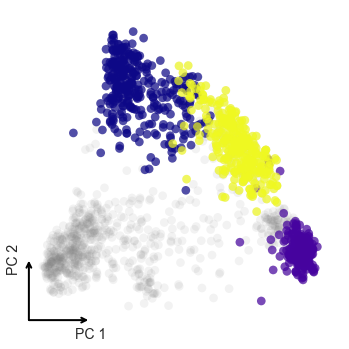

In [134]:
retina_tethered.plot_barcodes('PCA',ranks=['0','1','9'])

In [135]:
# perform tSNE and UMAP on the PCA results
retina_tethered.fcc_tSNE(data_type='PCA', perplexity=30, seed=18)
retina_tethered.fcc_UMAP(data_type='PCA', perplexity=30, seed=18)

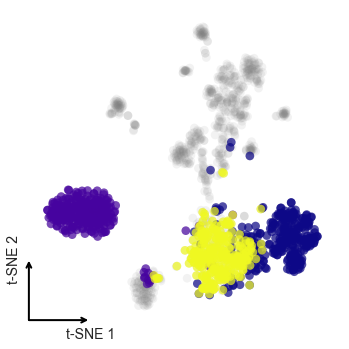

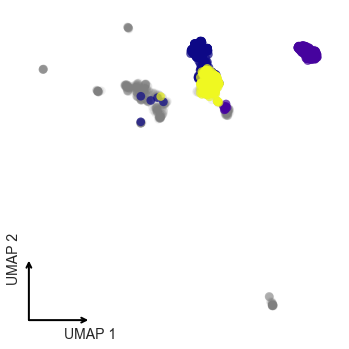

In [136]:
# see what both DR projections look like
retina_tethered.plot_barcodes('t-SNE',ranks=['0','1','9'])
retina_tethered.plot_barcodes('UMAP',ranks=['0','1','9'])

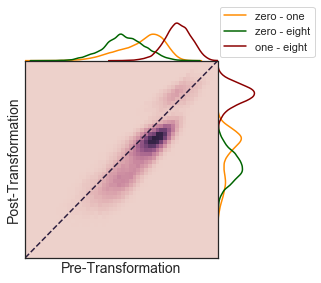

In [138]:
EMD, corr_stats = cluster_arrangement(pre_obj=retina, post_obj=retina, pre_type='counts', post_type='PCA', 
                                      clusters=['0','1','8'], cluster_names=['zero','one','eight'], figsize=(4,4), legend=True)

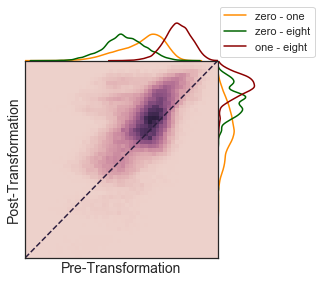

In [139]:
EMD, corr_stats = cluster_arrangement(pre_obj=retina, post_obj=retina, pre_type='counts', post_type='t-SNE', 
                                      clusters=['0','1','8'], cluster_names=['zero','one','eight'], figsize=(4,4), legend=True)

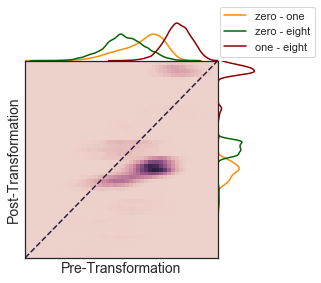

In [140]:
EMD, corr_stats = cluster_arrangement(pre_obj=retina, post_obj=retina, pre_type='counts', post_type='UMAP', 
                                      clusters=['0','1','8'], cluster_names=['zero','one','eight'], figsize=(4,4), legend=True)

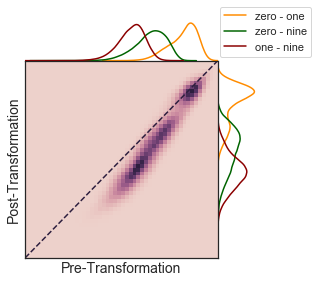

In [141]:
EMD, corr_stats = cluster_arrangement(pre_obj=retina_tethered, post_obj=retina_tethered, pre_type='counts', post_type='PCA', 
                                      clusters=['0','1','9'], cluster_names=['zero','one','nine'], figsize=(4,4), legend=True)

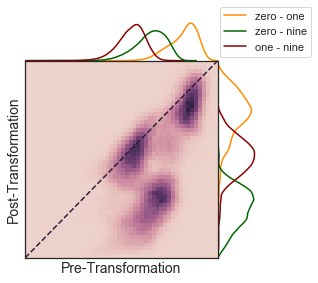

In [142]:
EMD, corr_stats = cluster_arrangement(pre_obj=retina_tethered, post_obj=retina_tethered, pre_type='counts', post_type='t-SNE', 
                                      clusters=['0','1','9'], cluster_names=['zero','one','nine'], figsize=(4,4), legend=True)

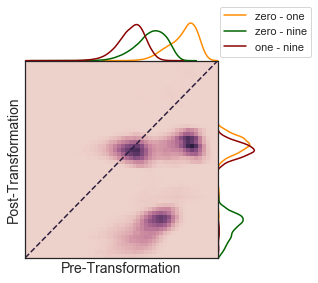

In [143]:
EMD, corr_stats = cluster_arrangement(pre_obj=retina_tethered, post_obj=retina_tethered, pre_type='counts', post_type='UMAP', 
                                      clusters=['0','1','9'], cluster_names=['zero','one','nine'], figsize=(4,4), legend=True)

In [144]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina.distance_matrix(data_type='counts',transform='arcsinh'), post=retina.distance_matrix(data_type='PCA'))
knn = knn_preservation(pre=retina.knn_graph(data_type='counts', k=30, transform='arcsinh'), post=retina.knn_graph(data_type='PCA', k=30))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

R: 0.9305
EMD: 0.1051
Knn Pres.: 97.8266
CPU times: user 38.4 s, sys: 7.85 s, total: 46.2 s
Wall time: 50.1 s


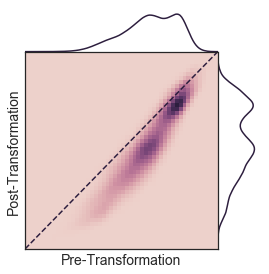

In [145]:
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [146]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina.distance_matrix(data_type='counts',transform='arcsinh'), post=retina.distance_matrix(data_type='t-SNE'))
knn = knn_preservation(pre=retina.knn_graph(data_type='counts', k=30, transform='arcsinh'), post=retina.knn_graph(data_type='t-SNE', k=30))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

R: 0.6745
EMD: 0.2543
Knn Pres.: 96.9245
CPU times: user 36.2 s, sys: 5.89 s, total: 42.1 s
Wall time: 42.4 s


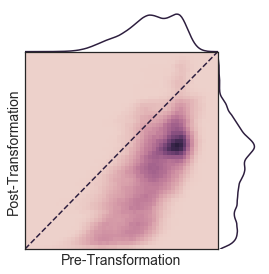

In [147]:
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [148]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina.distance_matrix(data_type='counts',transform='arcsinh'), post=retina.distance_matrix(data_type='UMAP'))
knn = knn_preservation(pre=retina.knn_graph(data_type='counts', k=30, transform='arcsinh'), post=retina.knn_graph(data_type='UMAP', k=30))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

R: 0.7011
EMD: 0.3125
Knn Pres.: 96.838
CPU times: user 36.4 s, sys: 6.76 s, total: 43.1 s
Wall time: 43.7 s


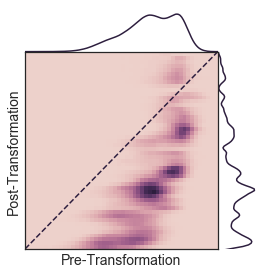

In [149]:
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

---

In [150]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina_tethered.distance_matrix(data_type='counts',transform='arcsinh'), post=retina_tethered.distance_matrix(data_type='PCA'))
knn = knn_preservation(pre=retina_tethered.knn_graph(data_type='counts', k=30, transform='arcsinh'), post=retina_tethered.knn_graph(data_type='PCA', k=30))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

R: 0.9239
EMD: 0.1411
Knn Pres.: 98.1707
CPU times: user 1min 3s, sys: 10.7 s, total: 1min 14s
Wall time: 1min 14s


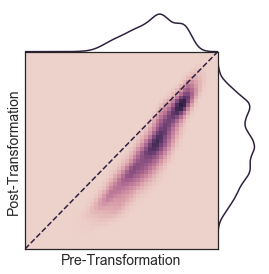

In [151]:
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [152]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina_tethered.distance_matrix(data_type='counts',transform='arcsinh'), post=retina_tethered.distance_matrix(data_type='t-SNE'))
knn = knn_preservation(pre=retina_tethered.knn_graph(data_type='counts', k=30, transform='arcsinh'), post=retina_tethered.knn_graph(data_type='t-SNE', k=30))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

R: 0.6421
EMD: 0.2446
Knn Pres.: 97.3513
CPU times: user 1min 1s, sys: 11.7 s, total: 1min 12s
Wall time: 1min 13s


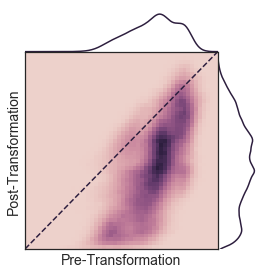

In [153]:
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

In [154]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina_tethered.distance_matrix(data_type='counts',transform='arcsinh'), post=retina_tethered.distance_matrix(data_type='UMAP'))
knn = knn_preservation(pre=retina_tethered.knn_graph(data_type='counts', k=30, transform='arcsinh'), post=retina_tethered.knn_graph(data_type='UMAP', k=30))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

R: 0.6112
EMD: 0.4018
Knn Pres.: 97.2968
CPU times: user 1min 1s, sys: 13.3 s, total: 1min 14s
Wall time: 1min 15s


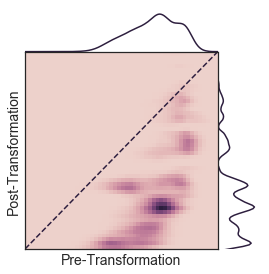

In [155]:
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

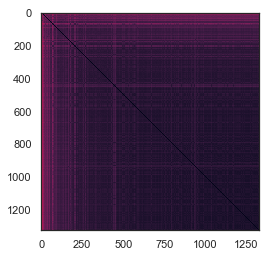

In [4]:
plt.imshow(retina.distance_matrix())